Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [1]:
import pandas as pd
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
df.shape

(10683, 11)

In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

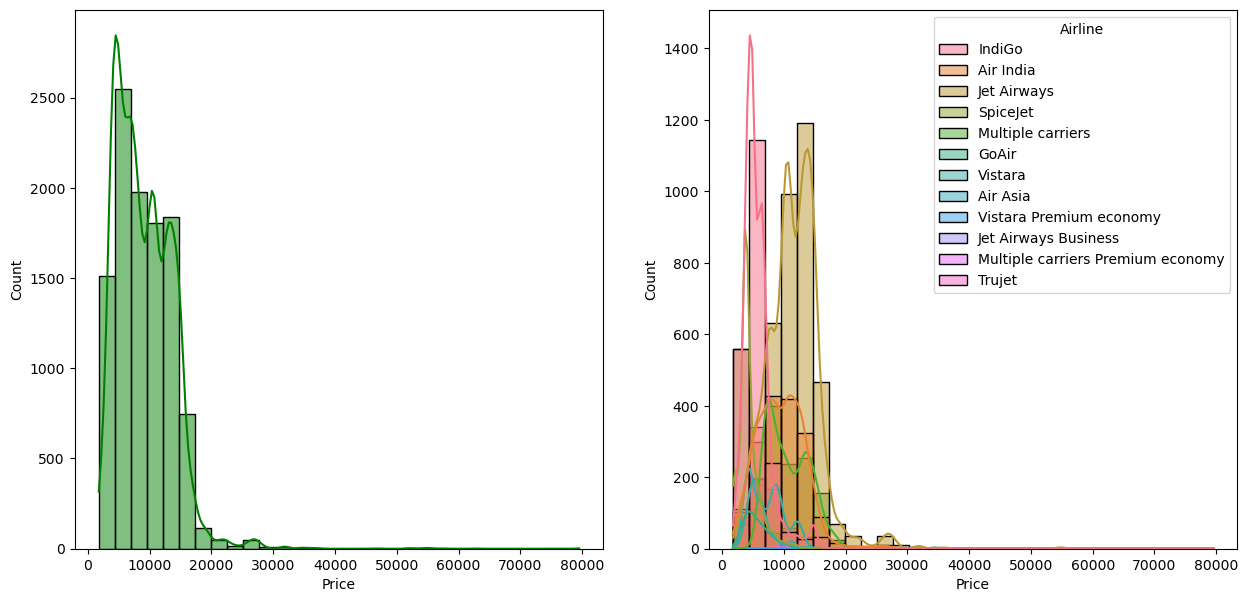

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Price',bins=30,kde=True,hue='Airline')
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [20]:
max_price=df['Price'].max()
min_price=df['Price'].min()
print('Max Price:',max_price)
print('Min Price:',min_price)

Max Price: 79512
Min Price: 1759


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

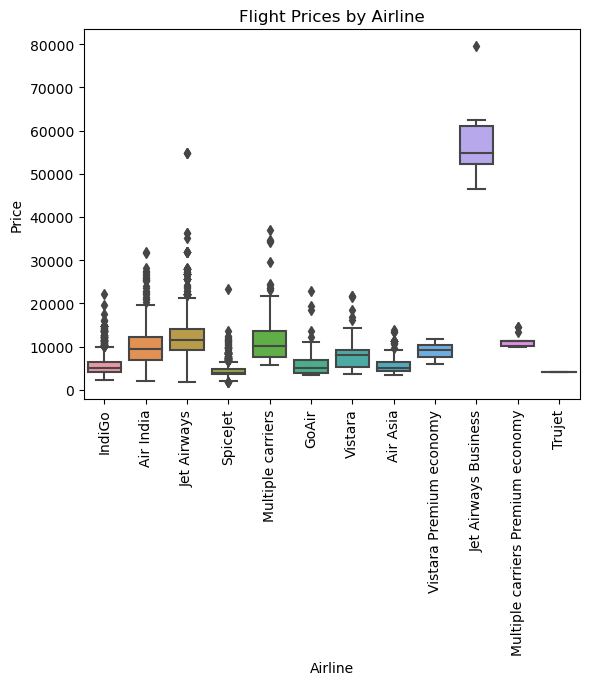

In [22]:
subset = df[['Airline', 'Price']]
sns.boxplot(x='Airline', y='Price', data=subset)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Flight Prices by Airline')
plt.xticks(rotation=90)
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

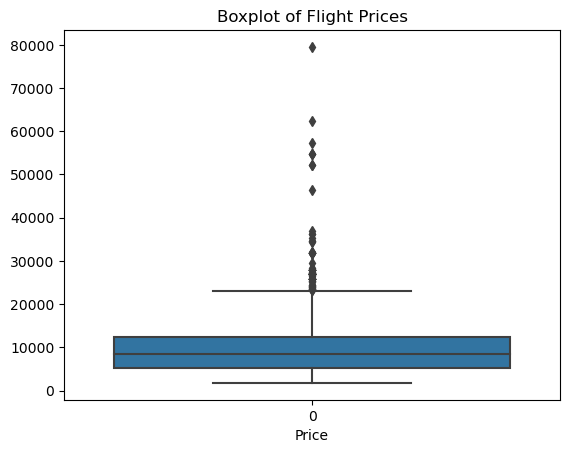

In [23]:
sns.boxplot(data=df['Price'])
plt.xlabel('Price')
plt.title('Boxplot of Flight Prices')
plt.show()

Identify Outliers: In the boxplot, outliers are represented as individual points beyond the whiskers of the boxplot. These points lie outside the range determined by the interquartile range (IQR). Any data point below the lower whisker or above the upper whisker is considered a potential outlier.

Impact on Analysis: Outliers can have various impacts on your analysis:

- Skewing Statistical Measures: Outliers can significantly affect statistical measures such as the mean and standard deviation, making them less representative of the central tendency and variability of the data.
- Biased Model Performance: Outliers can influence the performance and accuracy of predictive models, as they can have a disproportionate impact on the model's training and prediction.
- Distorted Patterns and Relationships: Outliers can distort patterns, trends, and relationships in the data, leading to incorrect conclusions or misleading insights.
- Violation of Assumptions: Outliers may violate assumptions of certain statistical tests or modeling techniques that assume a normal distribution or homogeneity of variance.

It is important to consider the nature and context of the data before deciding how to handle outliers. Depending on the specific analysis or modeling task, you can choose from several approaches, such as removing outliers, transforming the data, winsorizing, or using robust statistical methods.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

In [26]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [4]:
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [5]:
df['Duration_min'].isnull().sum()

1032

In [6]:
df['Duration_hour'].isnull().sum()

0

In [7]:
df['Duration_min']=df['Duration_min'].fillna(0)
df['Duration_min']=df['Duration_min'].astype(int)

In [8]:
df[~df['Duration_hour'].str.isnumeric()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hour,Duration_min
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,5m,0


In [19]:

df['Duration_hour']=df['Duration_hour'].replace()

In [22]:
df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hour,Duration_min
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,3,0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2,40
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,8,20


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Duration_hour    10683 non-null  object
 12  Duration_min     10683 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


To identify the peak travel season in the Flight Price dataset for your travel agency, you can analyze several features that are likely to provide insights into the seasonality of flight prices. Here are the features you could consider:

1. Date or Month: Analyze flight prices based on the date or month of the year to identify any seasonal patterns. This can help determine if prices tend to be higher or lower during specific months.

2. Day of the Week: Examine flight prices based on the day of the week to identify if there are any specific days when prices tend to be higher or lower. This can help identify any patterns related to weekends or weekdays.

3. Holidays or Special Events: Consider analyzing flight prices during holidays or special events. Prices may be higher during peak holiday seasons or major events when demand is greater.

4. Destination: Analyze flight prices based on the destination to identify if prices vary based on specific locations. Some destinations may have peak travel seasons due to weather, festivals, or other factors.

5. Historical Trends: Analyze historical data from previous years to identify any recurring patterns or trends in flight prices during specific seasons.

Once you have analyzed these features, you can present your findings to your boss in a comprehensive manner. Here's how you can structure your presentation:

1. Introduction:
- Provide a brief overview of the goal and importance of identifying the peak travel season for the travel agency.

2. Methodology:
- Explain the approach taken to analyze the Flight Price dataset, including the features considered and any data preprocessing steps.

3. Analysis and Findings:
- Present the findings of your analysis for each feature. Use visualizations such as line plots, bar charts, or heatmaps to illustrate the patterns and trends.
- For example, create a line plot showing the average flight prices by month to identify the months with higher prices.
- Show a bar chart illustrating the average flight prices by day of the week to identify any specific days with higher prices.
- Present a table or bar chart highlighting the average flight prices during holidays or special events.
- Display a heat map or bar chart showing the average flight prices by destination to identify peak travel locations.
- Analyze historical trends to identify any patterns or trends in flight prices during specific seasons.

4. Conclusion:
- Summarize the main findings and identify the peak travel season based on the analysis.

5. Recommendations:
- Provide recommendations based on the identified peak travel season, such as adjusting pricing strategies, promoting specific destinations, or offering discounts during off-peak seasons.

6. Limitations:
- Mention any limitations or assumptions inherent in the analysis, such as data availability, potential biases, or external factors affecting flight prices.

7. Next Steps:
- Suggest potential next steps, such as further analysis or integrating the findings into the travel agency's pricing strategy or marketing campaigns.

By analyzing these features and presenting your findings in a clear and concise manner, you can help your boss identify the peak travel season and make informed decisions for the travel agency.


Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

To identify trends in flight prices using the Flight Price dataset for a flight booking website, you can analyze several features that are likely to provide insights into price fluctuations. Here are the features you could consider:

1. Date or Time: Analyzing flight prices over time can reveal trends and patterns. You can examine how prices vary on a daily, weekly, monthly, or yearly basis.

2. Route or Destination: Analyze flight prices based on routes or destinations to identify any specific trends or patterns. Prices may vary depending on the popularity, distance, or seasonality of different routes.

3. Flight Duration: Investigate how flight prices correlate with the duration of the flights. Longer flights may have higher prices due to factors such as fuel costs or demand.

4. Airline: Analyze flight prices based on different airlines to identify any variations. Some airlines may consistently offer lower or higher prices compared to others.

5. Class or Cabin Type: Investigate how flight prices differ based on the class or cabin type (economy, business, first class). This analysis can provide insights into the price ranges for different travel preferences.

To present your findings effectively, you can use the following visualizations:

1. Line Chart: Use a line chart to plot flight prices over time, such as daily, weekly, or monthly. This visual representation can help identify any upward or downward trends in prices.

2. Bar Chart: Utilize a bar chart to compare flight prices based on different routes, airlines, or cabin types. This visualization can highlight price variations between different categories.

3. Scatter Plot: Create a scatter plot to show the relationship between flight duration and prices. This visualization can help identify any patterns or correlations between these variables.

4. Box Plot: Use a box plot to display the distribution of flight prices based on different airlines or routes. This visualization can reveal the range, median, and outliers within each category.

5. Heat Map: Utilize a heat map to showcase flight prices based on the combination of different features like date and destination. This visualization can provide a comprehensive view of price variations across various factors.

6. Geographic Plot: Utilize a map-based visualization to show flight prices based on different destinations. This can help identify any regional pricing patterns or highlight popular and expensive destinations.

By analyzing these features and presenting your findings using appropriate visualizations, you can effectively communicate trends in flight prices to your team at the flight booking website.

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

To identify the factors that affect flight prices using the Flight Price dataset for an airline company, you can analyze several features that are likely to influence pricing. Here are the features you could consider:

1. Departure and Arrival Cities: Analyze how flight prices vary based on different departure and arrival cities. Prices may differ depending on the popularity, distance, or demand of specific routes.

2. Airline: Investigate how flight prices differ among different airlines. Some airlines may offer lower or higher prices compared to others due to factors such as branding, service quality, or market positioning.

3. Flight Duration: Analyze how flight prices relate to the duration of the flights. Longer flights generally incur higher costs, so there may be a correlation between duration and price.

4. Cabin Class: Investigate how flight prices differ based on cabin classes such as economy, business, or first class. Higher classes typically come with additional amenities and comfort, leading to higher prices.

5. Time of Booking: Analyze how flight prices change depending on the time of booking, including factors like booking in advance or last-minute bookings. Prices may vary due to demand, availability, or promotional offers.

6. Time of Travel: Investigate how flight prices differ based on the time of travel, such as peak seasons, holidays, or weekdays versus weekends. Prices may be higher during peak travel periods or specific seasons.

To present your findings to the management team, you can follow these steps:

1. Introduction:
- Provide a brief overview of the analysis goal and its importance for the airline company.

2. Methodology:
- Explain the approach taken to analyze the Flight Price dataset, including the features considered and any data preprocessing steps.

3. Analysis and Findings:
- Present the findings of your analysis for each feature. Use visualizations such as bar charts, box plots, or heatmaps to illustrate the factors' impact on flight prices.
- For example, display a bar chart showing average flight prices for different departure and arrival cities.
- Use a box plot to compare flight prices among different airlines or cabin classes.
- Present line plots showcasing the relationship between flight prices and duration, time of booking, or time of travel.

4. Conclusion:
- Summarize the main findings and the significant factors impacting flight prices based on the analysis.

5. Recommendations:
- Provide recommendations based on the identified factors, such as adjusting pricing strategies, targeting specific routes or cabin classes, or offering promotions during specific booking periods.

6. Limitations:
- Mention any limitations or assumptions inherent in the analysis, such as data availability, potential biases, or external factors affecting flight prices.

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [79]:
import pandas as pd
df=pd.pandas.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
num_rows = df.shape[0]
num_columns = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 10841
Number of columns: 13


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

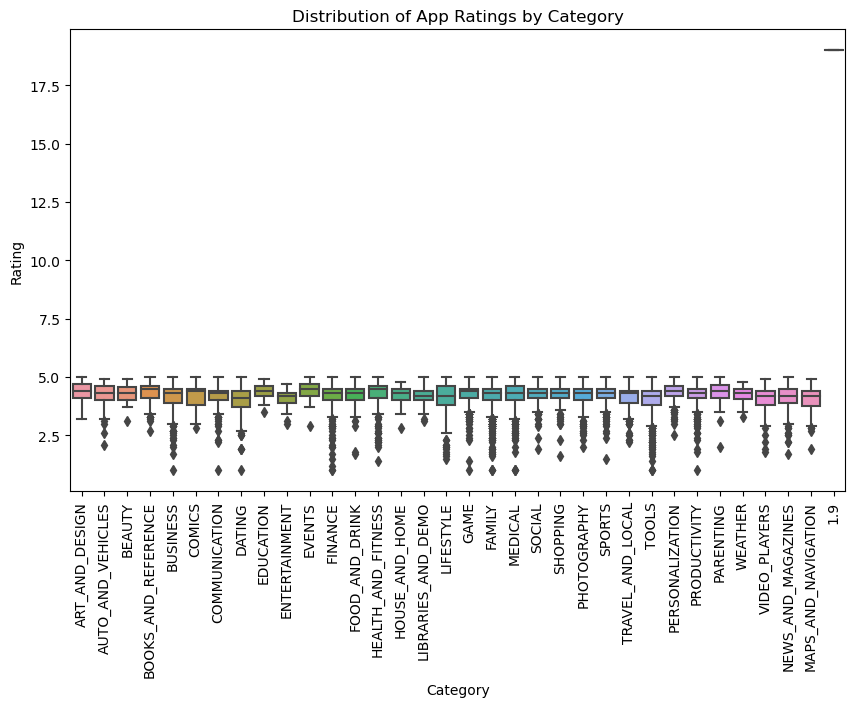

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Adjust the figure size if needed
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90) # Rotate the x-axis labels if needed
plt.title('Distribution of App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Missing values can impact your analysis in several ways:

1. Biased Results: If missing values are not handled properly, they can introduce bias in your analysis. For example, if the 'Rating' column has missing values, excluding those records may skew the distribution and affect any analysis based on ratings.

2. Reduced Sample Size: Missing values can decrease the sample size available for analysis. This reduction in the sample size may impact the statistical power of your analysis and limit the generalizability of your findings.

3. Data Integrity and Accuracy: Missing values may indicate data quality issues. Incorrect or incomplete data can affect the accuracy and reliability of your analyses and conclusions. It's important to understand the reasons behind missing values and consider their impact on the validity of your results.

To handle missing values, you can impute them using various techniques such as mean imputation, median imputation, or using advanced imputation algorithms. Alternatively, if the missing values are significant, you may need to consider excluding the corresponding records or variables from your analysis.

Before proceeding with your analysis, it is important to carefully assess the nature and impact of missing values in the dataset and make informed decisions regarding imputation or exclusion based on the specific context and objectives of your analysis.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [18]:
import numpy as np
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)


In [23]:
df['Size']=df['Size'].replace('+')

In [29]:
df['Size'] = pd.to_numeric(df['Size'].str.replace('M', '').str.replace('k', ''), errors='coerce')


AttributeError: Can only use .str accessor with string values!

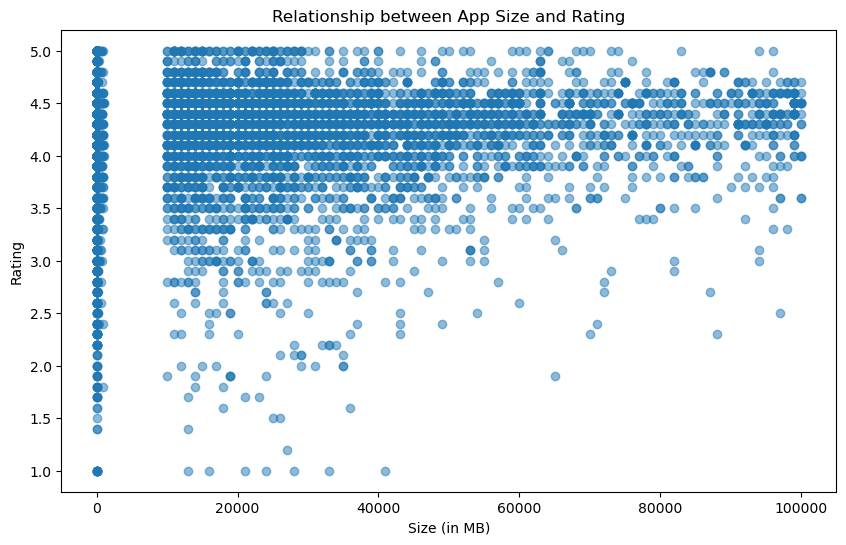

In [31]:
plt.figure(figsize=(10, 6)) # Adjust the figure size if needed
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.title('Relationship between App Size and Rating')
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')
plt.show()

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [81]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [82]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df[cols]=df[cols].str.replace(item,'')

/tmp/ipykernel_91/2031856696.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[cols]=df[cols].str.replace(item,'')


In [83]:
df['Price']=df['Price'].astype('float')

In [80]:
df['Price']=df['Price'].str.replace('Everyone','0')


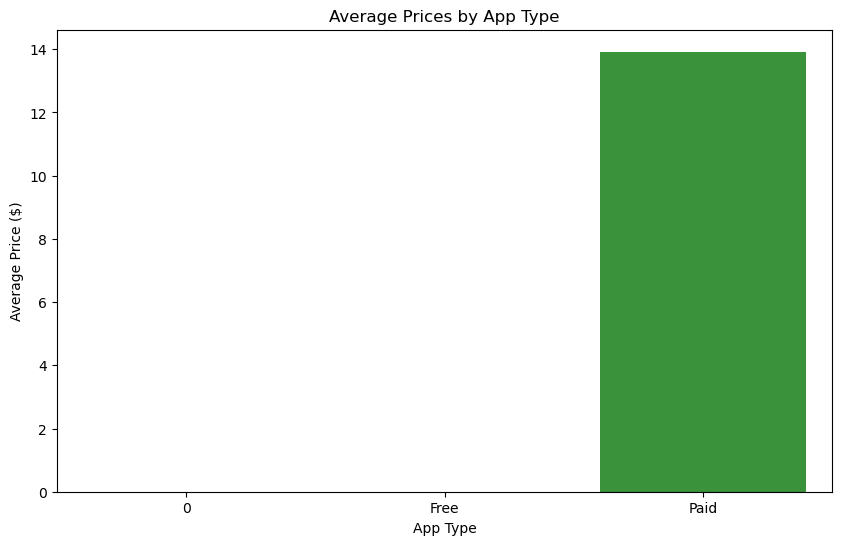

In [84]:
average_prices = df.groupby('Type')['Price'].mean()
plt.figure(figsize=(10, 6)) # Adjust the figure size if needed
sns.barplot(x=average_prices.index, y=average_prices.values)
plt.title('Average Prices by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price ($)')
plt.show()

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [86]:
install_freq = df['Installs'].value_counts().reset_index()
install_freq.columns = ['Installs', 'Count']
install_freq = install_freq.sort_values('Count', ascending=False)
top_10_apps = install_freq.head(10)
print(top_10_apps)

   Installs  Count
0   1000000   1579
1  10000000   1252
2    100000   1169
3     10000   1054
4      1000    907
5   5000000    752
6       100    719
7    500000    539
8     50000    479
9      5000    477


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

To identify the most popular app categories in the Google Play Store dataset and make recommendations to the company regarding their new app launch, you can follow these steps:

1. Analyze App Categories: Begin by analyzing the distribution of apps across different categories. Calculate the frequency or percentage of apps in each category to identify the most common categories. This will give you an initial understanding of which categories are popular among users.

2. Explore App Installs: Investigate the distribution of app installs across different categories. Calculate the average number of installs for each category and identify categories with higher average installs. This will help you determine the popularity and demand for apps in each category.

3. Consider User Ratings: Analyze user ratings for apps in each category. Calculate the average rating for each category and examine any variations or trends. Higher average ratings may indicate more satisfied users, which can contribute to the popularity of apps in a particular category.

4. Examine Reviews and Feedback: Look at the number of reviews and feedback provided by users for apps in each category. Higher numbers of reviews may indicate higher user engagement and popularity within a category. Analyze the sentiment of the reviews to understand user satisfaction and identify any potential improvements or gaps in each category.

5. Consider Competition: Evaluate the level of competition within different app categories. Look at the number of apps available in each category and consider the market saturation. A highly competitive category may require a unique value proposition or differentiation strategy for a new app to stand out.

Based on the analysis of these features, you can make recommendations to the company regarding the most popular app categories for their new app launch. Consider factors such as the popularity and demand for apps in a category, user ratings and feedback, market saturation, and potential opportunities for differentiation.

Additionally, it's important to consider the company's target audience, business goals, and the unique features or value proposition of their new app. Aligning these factors with the insights gained from the dataset analysis will help in making informed recommendations to the company.


Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Play Store dataset and make recommendations to a mobile app development company, you can analyze various features. Here are some features to consider and the corresponding data visualizations to present your findings:

1. Number of Installs: Analyze the total number of installs for each app developer. Calculate the sum of installs for all apps developed by each developer to identify the most successful ones. You can present this information using a bar chart or a horizontal bar chart, with the developer names on the y-axis and the total number of installs on the x-axis.

2. Average Rating: Evaluate the average rating of apps developed by each developer. Calculate the mean rating for all apps developed by each developer to understand the quality and user satisfaction of their apps. Present this information using a bar chart or a horizontal bar chart, with the developer names on the y-axis and the average rating on the x-axis.

3. Number of Apps: Consider the total number of apps developed by each developer. Analyze the count of apps developed by each developer to assess their productivity and experience. You can present this information using a bar chart or a horizontal bar chart, with the developer names on the y-axis and the count of apps on the x-axis.

4. Category Distribution: Examine the distribution of app categories developed by each developer. Calculate the frequency or percentage of apps in each category developed by each developer to identify their focus areas. Present this information using a stacked bar chart, with the developer names on the x-axis, the app categories as the different bars, and the height of each bar representing the percentage or count of apps.

5. User Reviews and Feedback: Analyze user reviews and feedback for apps developed by each developer. Consider the sentiment analysis of the reviews and the number of positive/negative feedback. Use word clouds or sentiment analysis plots to present this information, highlighting the most common positive and negative sentiments expressed by users for each developer.

Additionally, you can combine these features to calculate an overall score or rank for each app developer, considering factors such as installs, ratings, and the number of apps developed. Presenting this information using a ranked bar chart or a table can help identify the top-performing app developers.

By analyzing these features and utilizing appropriate data visualizations, you can provide the mobile app development company with insights on the most successful app developers in terms of installs, ratings, app count, category distribution, and user feedback. These findings can guide the company's decision-making process, partnerships, or investment opportunities in the app development space.


Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

To identify the best time to launch a new app in the Google Play Store dataset and make recommendations to a marketing research firm, you can analyze various features. Here are some features to consider and the corresponding data visualizations to present your findings:

1. Monthly Installs: Analyze the number of installs per month to identify any seasonal or monthly trends in app installations. Calculate the total number of installs for each month across all apps to understand patterns in user behavior. You can present this information using a line chart or a bar chart, with the months on the x-axis and the total number of installs on the y-axis.

2. Revenue and Pricing: Evaluate the revenue and pricing trends for apps in different months. Analyze the average revenue generated by apps and the average price of apps in each month to identify any fluctuations or patterns. You can present this information using a line chart, with the months on the x-axis and the average revenue or price on the y-axis.

3. User Ratings and Reviews: Examine user ratings and reviews in different months to understand user sentiment and satisfaction. Analyze the average rating and the sentiment of user reviews for apps launched in different months. You can present this information using bar charts or line charts, with the months on the x-axis and the average rating or sentiment on the y-axis.

4. Competition Analysis: Consider the number of new app launches and competition in different months. Analyze the count of new apps launched in each month and evaluate the level of competition. You can present this information using a bar chart or a line chart, with the months on the x-axis and the count of new apps or competition level on the y-axis.

5. App Category Analysis: Evaluate the performance of different app categories in different months. Analyze the number of installs, revenue, or user ratings for apps in each category in different months to identify any category-specific trends. You can present this information using grouped bar charts or line charts, with the months on the x-axis, the different app categories as different bars or lines, and the number of installs, revenue, or ratings on the y-axis.

Additionally, you can combine these features to identify the most favorable months for app launches. For example, you can calculate an overall score or rank for each month based on factors such as installs, revenue, ratings, and competition. Presenting this information using a ranked bar chart or a table can help identify the best time to launch a new app.

By analyzing these features and utilizing appropriate data visualizations, you can provide the marketing research firm with insights on the best time to launch a new app in terms of installs, revenue, pricing, user feedback, and competition. These findings can guide the firm's decision-making process and help them optimize their app launch strategy.